### Objective:
Data exploration \
First kaggle notebook

Index:\
Understanding the data\
Visalization

### Prerequisites

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Importing the dataset
data = pd.read_csv('/kaggle/input/all-indian-companies-registration-data-1900-2019/registered_companies.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df = data

### Working the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 17 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         object 
 1   COMPANY_NAME                            object 
 2   COMPANY_STATUS                          object 
 3   COMPANY_CLASS                           object 
 4   COMPANY_CATEGORY                        object 
 5   COMPANY_SUB_CATEGORY                    object 
 6   DATE_OF_REGISTRATION                    object 
 7   REGISTERED_STATE                        object 
 8   AUTHORIZED_CAP                          float64
 9   PAIDUP_CAPITAL                          float64
 10  INDUSTRIAL_CLASS                        object 
 11  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  object 
 12  REGISTERED_OFFICE_ADDRESS               object 
 13  REGISTRAR_OF_COMPANIES                  object 
 14  EMAIL_ADDR                        

-There are a lot of categoricals to work with \
-Many columns seem broadly empty \

In [7]:
print(f"Total Values : {len(df)}\n")
for x in df.columns:
    print(f'{len(df)-df[x].count()} values missing in {x}')

Total Values : 1992170

0 values missing in CORPORATE_IDENTIFICATION_NUMBER
0 values missing in COMPANY_NAME
0 values missing in COMPANY_STATUS
5078 values missing in COMPANY_CLASS
5085 values missing in COMPANY_CATEGORY
5090 values missing in COMPANY_SUB_CATEGORY
2525 values missing in DATE_OF_REGISTRATION
0 values missing in REGISTERED_STATE
0 values missing in AUTHORIZED_CAP
0 values missing in PAIDUP_CAPITAL
4811 values missing in INDUSTRIAL_CLASS
12 values missing in PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN
15259 values missing in REGISTERED_OFFICE_ADDRESS
42198 values missing in REGISTRAR_OF_COMPANIES
370208 values missing in EMAIL_ADDR
831317 values missing in LATEST_YEAR_ANNUAL_RETURN
828829 values missing in LATEST_YEAR_FINANCIAL_STATEMENT


In [8]:
print(len(df))
df.head(3)

1992170


,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F01450,NIKO RESOURCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"4TH FLOOR,LANDMARKRACE COURSE",ROC DELHI,SANJAY@NIKOINDIA.COM,NaN,NaN
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,NaN,NaN,NaN,16-07-1998,Gujarat,0.0,0.0,NaN,Agriculture & allied,403 3 6 322 MAHAVIR HOUSEBUSHEER BAGH HYDERGUD...,ROC DELHI,NaN,NaN,NaN
2,F01573,ATWOOD OCEANIC PACIFIC LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Quadrant 1, Plot Number 18, 2nd FloorSuman Tow...",ROC DELHI,info@nangia.com,NaN,NaN


In [9]:
df = df.dropna()
print(len(df))
df.head(3)

1124485


,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
70,L01110GJ1991PLC015846,AMRAWORLD AGRICO LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,21-06-1991,Gujarat,130000000.0,120300000.0,1110.0,Agriculture & allied,"24, LAXMI CHAMBERS, NAVJEEVAN PRESS ROAD,OPP. ...",ROC AHMEDABAD,amraworldagrico@gmail.com,31-03-2019,31-03-2019
71,L01110GJ1994PLC021066,TRANS TECHNO FOODS LIMITED,ULQD,Public,Company limited by Shares,Non-govt company,17-01-1994,Gujarat,220000000.0,211200000.0,1110.0,Agriculture & allied,B-2 SARITA DARSHAN OPP JAIHIND PRESSASHRAM ROAD,ROC AHMEDABAD,anish_shahcs@yahoo.com,31-03-2009,31-03-2006
72,L01110GJ1994PLC021368,GALAXY AGRICO EXPORTS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,23-02-1994,Gujarat,55000000.0,27316200.0,1110.0,Agriculture & allied,"236, Jai Kishan Industrial Estate,Behind Murli...",ROC AHMEDABAD,info@galaxyagrico.com,31-03-2019,31-03-2019


In [10]:
dropCols = ["LATEST_YEAR_FINANCIAL_STATEMENT",
            "EMAIL_ADDR", "COMPANY_NAME",
            "LATEST_YEAR_ANNUAL_RETURN",
            "CORPORATE_IDENTIFICATION_NUMBER",
            "REGISTERED_OFFICE_ADDRESS"]

df = df.drop(dropCols, axis=1)

In [11]:
df["DATE_OF_REGISTRATION"] = df["DATE_OF_REGISTRATION"].apply(pd.to_datetime)
#df["INDUSTRIAL_CLASS"] = df["INDUSTRIAL_CLASS"].astype(int)

In [12]:
df['REG_YEAR'] = df['DATE_OF_REGISTRATION'].dt.year
df['REG_MONTH'] = df['DATE_OF_REGISTRATION'].dt.month
df = df.drop('DATE_OF_REGISTRATION', axis=1)

In [13]:
#columns along the number of unique items in them along a list of it
for x in df.columns:
    print(f'{x} : {len(df[x].unique())}\n{df[x].unique()[:20]}\n')

COMPANY_STATUS : 12
['ACTV' 'ULQD' 'AMAL' 'DISD' 'CLLD' 'UPSO' 'STOF' 'CLLP' 'D455' 'NAEF'
 'LIQD' 'DRMT']

COMPANY_CLASS : 3
['Public' 'Private' 'Private(One Person Company)']

COMPANY_CATEGORY : 3
['Company limited by Shares' 'Company Limited by Guarantee'
 'Unlimited Company']

COMPANY_SUB_CATEGORY : 5
['Non-govt company' 'State Govt company' 'Subsidiary of Foreign Company'
 'Guarantee and Association comp' 'Union Govt company']

REGISTERED_STATE : 36
['Gujarat' 'Karnataka' 'Rajasthan' 'Madhya Pradesh' 'Uttaranchal' 'Assam'
 'Jharkhand' 'Tamil Nadu' 'Delhi' 'Maharashtra' 'Haryana' 'Chattisgarh'
 'Daman and Diu' 'West Bengal' 'Lakshadweep' 'Himachal Pradesh'
 'Dadra and Nagra Haveli' 'Kerala' 'Pondicherry' 'Jammu and Kashmir']

AUTHORIZED_CAP : 8463
[1.3e+08 2.2e+08 5.5e+07 6.0e+07 3.2e+08 1.7e+08 8.0e+07 7.7e+08 6.1e+07
 5.0e+07 1.0e+08 7.5e+07 2.5e+08 7.0e+07 5.0e+09 1.5e+11 1.5e+08 1.5e+09
 2.0e+07 2.6e+08]

PAIDUP_CAPITAL : 134551
[1.20300000e+08 2.11200000e+08 2.73162000e+07 4.9

In [14]:
#Naming conveniences

df["COMPANY_CLASS"] = df["COMPANY_CLASS"].apply(lambda x:"Solo" if x == 'Private(One Person Company)' else x)
print(df["COMPANY_CLASS"].unique())

df["REGISTRAR"] = df["REGISTRAR_OF_COMPANIES"].apply(lambda x:x.split("ROC\xa0")[-1])
print(df["REGISTRAR"].unique())

df["PRINCIPAL_BUSINESS"] = df["PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN"].apply(lambda x:x.split(" ")[0])
print(df["PRINCIPAL_BUSINESS"].unique())

#Creating bins for REGISTRATION_YEAR

df["REG_YEAR_5BIN"] = df["REG_YEAR"].apply(lambda x:(round(x/5))*5)
print(df["REG_YEAR_5BIN"].unique())

df["REG_YEAR_10BIN"] = df["REG_YEAR"].apply(lambda x:(round(x/10))*10)
print(df["REG_YEAR_10BIN"].unique())
      
df["REG_YEAR_20BIN"] = df["REG_YEAR"].apply(lambda x:(round(x/20))*20)
print(df["REG_YEAR_20BIN"].unique())

['Public' 'Private' 'Solo']
['AHMEDABAD' 'GOA' 'BANGALORE' 'JAIPUR' 'KOLKATA' 'GWALIOR' 'UTTARAKHAND'
 'KANPUR' 'SHILLONG' 'JHARKHAND' 'PATNA' 'COIMBATORE' 'CHENNAI'
 'HYDERABAD' 'DELHI' 'MUMBAI' 'PUNE' 'ERNAKULAM' 'CHHATTISGARH' 'HP'
 'PONDICHERRY' 'JAMMU' 'CUTTAK' 'CHANDIGARH' 'ANDAMAN']
['Agriculture' 'Mining' 'Manufacturing' 'Electricity' 'Construction'
 'Wholesale' 'Unclassified' 'Hotels' 'Transport' 'Financial' 'Real'
 'Education' 'Health' 'Other' 'Extraterritorial' 'Activities' 'Public']
[1990 1995 2010 2005 2015 1980 1985 1965 1970 1955 1915 1920 1930 1935
 1950 1960 1975 2000 1945 1940 2020 1905 1910 1890 1895 1900 1925 1880
 1875 1885 1870 1865]
[1990 2000 2010 1980 1960 1970 1910 1920 1930 1940 1950 2020 1900 1890
 1880 1870 1860]
[2000 2020 1980 1960 1920 1940 1900 1880 1860]


### Visualization

In [15]:
#Working with a smaller randomly picked sample space for efficiency and overall population testing.
df = df.sample(n=10000)

In [16]:
#For readability since I use dark mode
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='magma',
              font='sans-serif',
              font_scale=0.6,
              color_codes=True,
              rc=None)

<AxesSubplot:xlabel='REG_YEAR', ylabel='COMPANY_CLASS'>

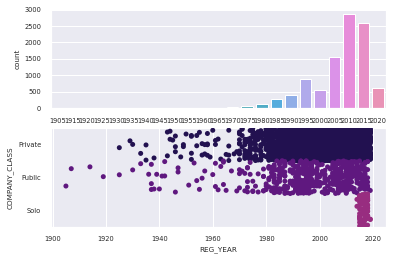

In [17]:
f, ax = plt.subplots(2)

#Counting all the number fo companies by REG_YEAR

sns.countplot(x="REG_YEAR_5BIN",
              data=df, ax = ax[0])


#Year of registration by COMPANY_CLASS

sns.stripplot(x="REG_YEAR",
              y="COMPANY_CLASS",
              data=df, jitter=0.5,
              ax = ax[1])

['Private' 'Public' 'Solo']


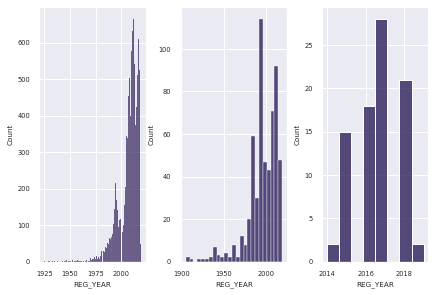

In [18]:
f, ax = plt.subplots(1, len(df["COMPANY_CLASS"].unique()))
f.tight_layout()
y=0
print(df["COMPANY_CLASS"].unique())
for x in df["COMPANY_CLASS"].unique():
    sns.histplot(x="REG_YEAR",
                data=df[df["COMPANY_CLASS"]==x],
                ax=ax[y])
    y+=1

India is seeing a increasing number of new companies being registered which a vast proportion of them being in the 2000s+ \
Solo COMPANY_CLASS catches traction post 2010+ from the first lower plot and can see appearing from 2014 in this sample space on the second rightmost plot.\
The majority of companies are classified as Private (density of the first lower plot & count in second plot).



<AxesSubplot:xlabel='COMPANY_CLASS', ylabel='count'>

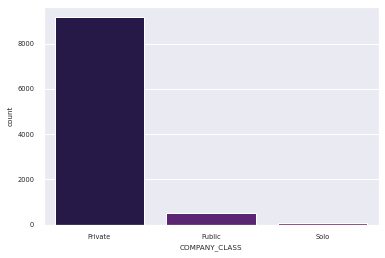

In [19]:
sns.countplot(x="COMPANY_CLASS",
              data=df[df["REG_YEAR"] >= 1982]) #Change year

<AxesSubplot:xlabel='REG_YEAR', ylabel='PRINCIPAL_BUSINESS'>

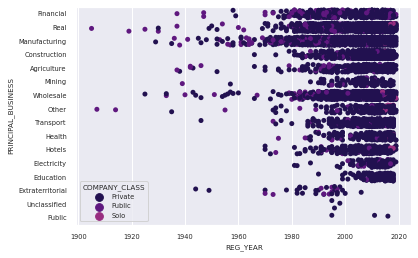

In [20]:
#Industry of companies

sns.stripplot(x="REG_YEAR",
              y="PRINCIPAL_BUSINESS",
              hue="COMPANY_CLASS",
              data=df, jitter=0.3)

['Private' 'Public' 'Solo']


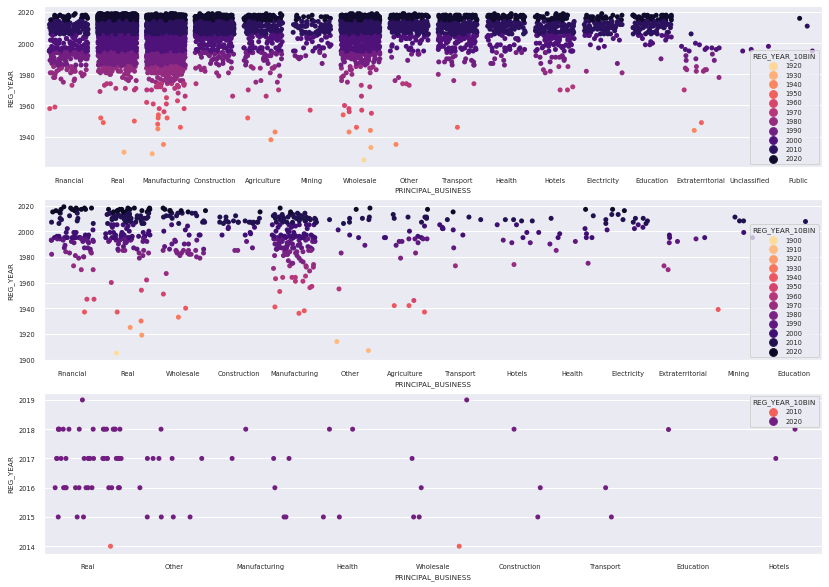

In [21]:
#Companies in respect to COMPANY_CLASS over time.
y=0
f, ax = plt.subplots(len(df["COMPANY_CLASS"].unique()),1)
f.subplots_adjust(top=1, bottom=-0.9, left=-0.9, hspace=0.2)
print(df["COMPANY_CLASS"].unique())
for x in df["COMPANY_CLASS"].unique():
    sns.stripplot(y="REG_YEAR",
                x="PRINCIPAL_BUSINESS",
                data=df[df["COMPANY_CLASS"]==x],
                hue="REG_YEAR_10BIN",
                palette="magma_r",
                jitter=0.4,
                ax=ax[y])
    y+=1

-Wholesale, Manufacturing and Real Estate have the highest number private companies.\
-Public companies incline towards manufacturing followed by Real Estate and Financials.\
-Interesting how private companies have a big concentration in Real Estate.\
-Companies under Education and electricity industry started late.

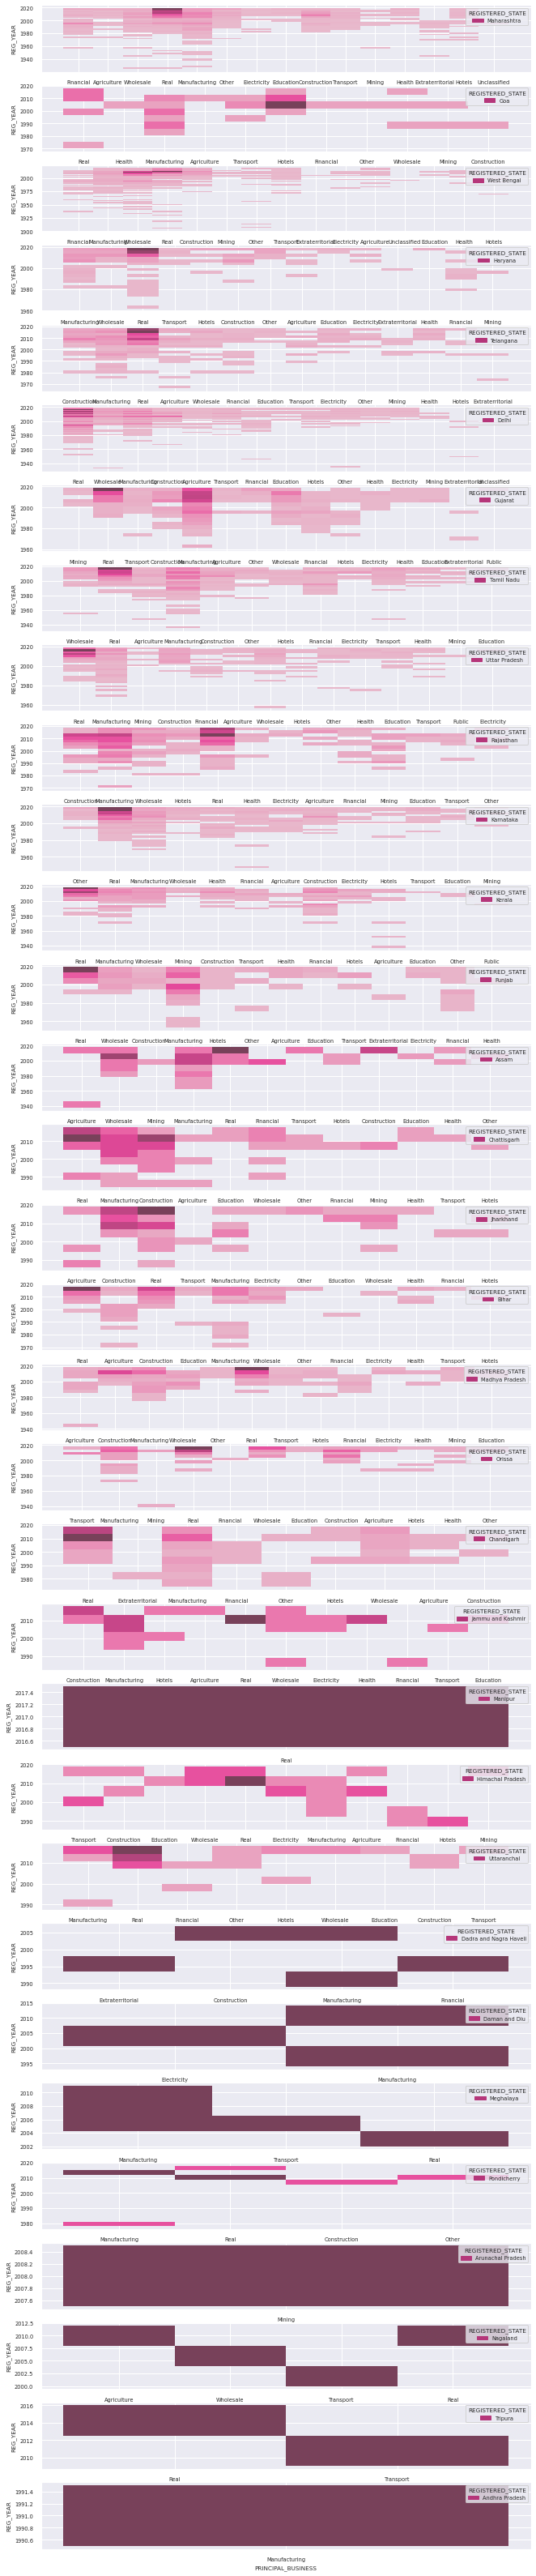

In [22]:
#State wise looking at the industries through time

y=0; f, ax = plt.subplots(len(df["REGISTERED_STATE"].unique()),1)
f.subplots_adjust(top=10, bottom=-0.9, left=-0.5, hspace=0.2)
for x in df["REGISTERED_STATE"].unique():
    sns.histplot(y='REG_YEAR',
                  x='PRINCIPAL_BUSINESS',
                  #jitter=0.3,
                  hue="REGISTERED_STATE",
                  palette="magma_r",
                  data= df[df["REGISTERED_STATE"]==x],
                  ax=ax[y])
    y+=1

#### Hypothesis